## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [17]:
import pandas as pd
data=pd.read_csv("./github_bot_processed_data.csv")
data.head()

label  type  ...                 updated_at  text_bot_count
0  Human  True  ...  2023-10-13 11:21:10+00:00               0
1  Human  True  ...  2023-10-07 06:26:14+00:00               0
2  Human  True  ...  2023-10-02 02:11:21+00:00               0
3    Bot  True  ...  2023-10-12 12:54:59+00:00               0
4  Human  True  ...  2023-10-06 11:58:41+00:00               0

[5 rows x 15 columns]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB


In [19]:
data.describe()

public_repos  public_gists     followers     following  text_bot_count
count  19768.000000  19768.000000  19768.000000  19768.000000    19768.000000
mean      84.139215     25.214083    245.497015     44.520741        0.061362
std      574.750217    635.690142   1535.939961    366.793439        0.341003
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%       11.000000      0.000000      7.000000      0.000000        0.000000
50%       35.000000      2.000000     33.000000      4.000000        0.000000
75%       83.000000     10.000000    125.000000     22.000000        0.000000
max    50000.000000  55781.000000  95752.000000  27775.000000        5.000000

In [20]:
from datetime import datetime
data[["created_at","updated_at"]].map(lambda s:datetime.fromisoformat(s).astimezone())

created_at                updated_at
0     2011-09-27 01:27:03+08:00 2023-10-13 19:21:10+08:00
1     2015-06-29 18:12:46+08:00 2023-10-07 14:26:14+08:00
2     2008-08-30 00:20:03+08:00 2023-10-02 10:11:21+08:00
3     2014-05-21 02:43:09+08:00 2023-10-12 20:54:59+08:00
4     2012-08-16 22:19:13+08:00 2023-10-06 19:58:41+08:00
...                         ...                       ...
19763 2014-07-03 07:27:34+08:00 2023-08-16 00:38:34+08:00
19764 2017-12-07 05:56:31+08:00 2023-07-27 02:32:25+08:00
19765 2015-11-14 22:44:05+08:00 2022-08-24 05:09:49+08:00
19766 2021-11-24 02:55:29+08:00 2023-10-07 06:50:45+08:00
19767 2016-04-23 06:11:59+08:00 2022-07-08 03:48:21+08:00

[19768 rows x 2 columns]

In [21]:
import numpy as np
log_data=data[["public_repos","public_gists","followers","following"]].apply(np.log10)
log_data.columns="log_"+log_data.columns
print(log_data)

       log_public_repos  log_public_gists  log_followers  log_following
0              1.414973          0.000000       0.698970       0.000000
1              1.477121          0.477121       0.954243       0.778151
2              2.012837          1.690196       3.083503       2.344392
3              1.690196              -inf       1.924279       0.301030
4              1.041393          0.000000       0.778151       0.301030
...                 ...               ...            ...            ...
19763          1.556303          1.204120       1.041393       0.602060
19764          1.204120              -inf       0.477121           -inf
19765          1.113943              -inf       1.000000       0.000000
19766          0.845098              -inf       0.301030           -inf
19767          1.000000              -inf       0.000000           -inf

[19768 rows x 4 columns]


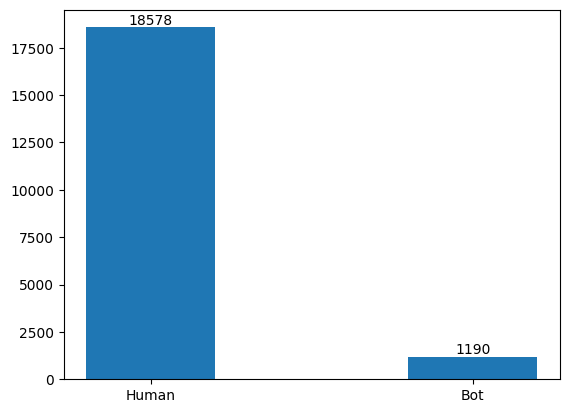

In [22]:
import matplotlib.pyplot as plt
x=data["label"].value_counts()
bar=plt.bar(x.index,x,width=0.4)
plt.bar_label(bar,x)
plt.show()

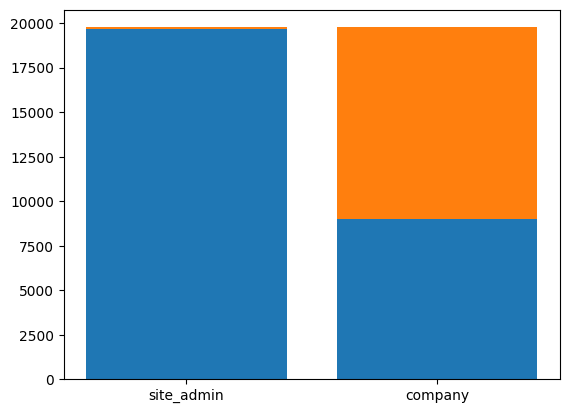

In [23]:
x=data["site_admin"].value_counts()
y=data["company"].value_counts()
labels=["site_admin","company"]
h1=[x[False],y[False]]
h2=[x[True],y[True]]
plt.bar(labels,h1)
plt.bar(labels,h2,bottom=h1)
plt.show()


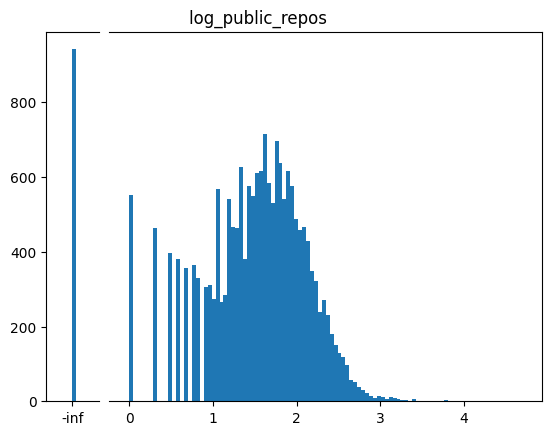

In [24]:
i_inf=(log_data["log_public_repos"]==-np.inf)
x=log_data["log_public_repos"][i_inf]
x=np.full_like(x,-10000)
y=log_data["log_public_repos"][np.logical_not(i_inf)]

ax1=plt.subplot(1,8,1)
ax1.set_xticks([-10000])
ax1.set_xticklabels(['-inf'])
ax1.spines["right"].set_visible(False)
ax1.hist(x,bins=12)

ax2=plt.subplot(1,8,(2,8),sharey=ax1)
ax2.tick_params(axis='y',left=False,labelleft=False)
ax2.spines["left"].set_visible(False)
ax2.hist(y,bins=100)
plt.title("log_public_repos                          ")
plt.show()

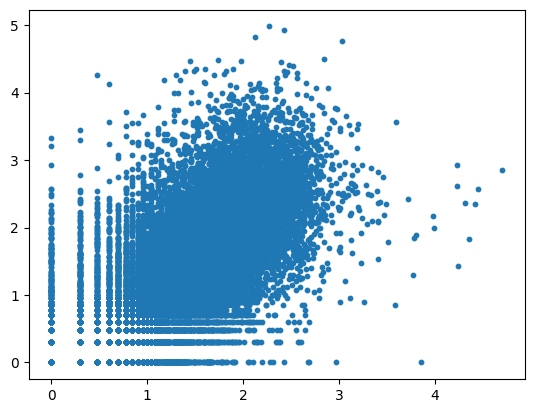

In [25]:
plt.scatter(log_data["log_public_repos"],log_data["log_followers"],s=10)
plt.show()

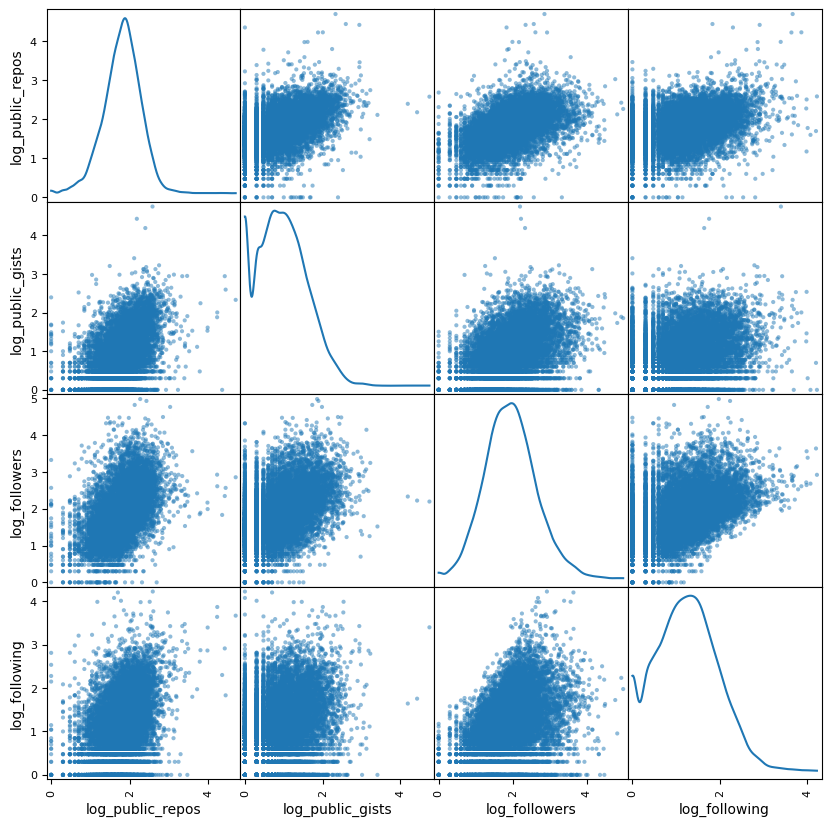

In [26]:
x=(log_data==-np.inf).apply(lambda r:np.any(r),axis=1)
pd.plotting.scatter_matrix(log_data.drop(log_data.index[x],axis=0,inplace=False),figsize=(10,10),diagonal='kde')
plt.show()

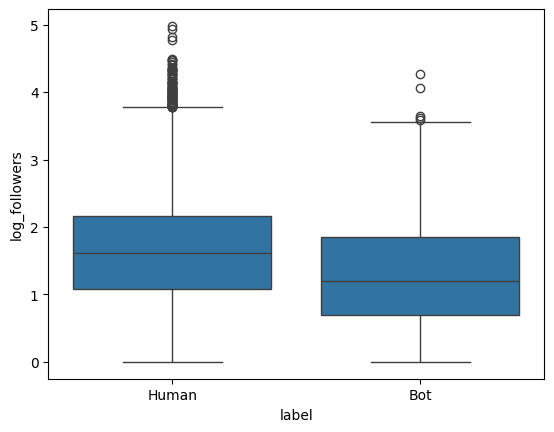

In [27]:
import seaborn as sns
data_c=pd.concat([data,log_data],axis=1)
sns.boxplot(data_c,x='label',y='log_followers')
plt.show()

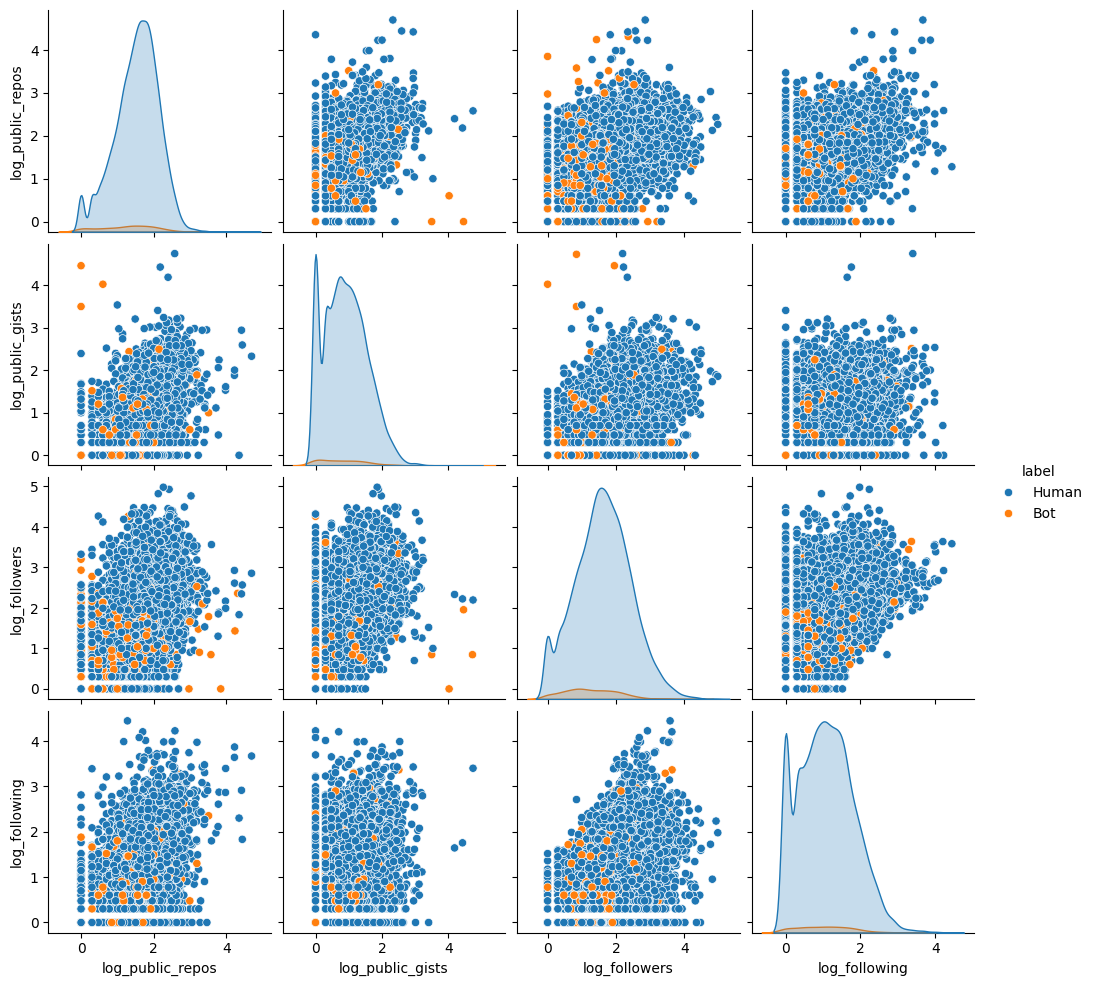

In [28]:
sns.pairplot(data_c,hue='label',vars=['log_public_repos','log_public_gists','log_followers','log_following'])
plt.show()

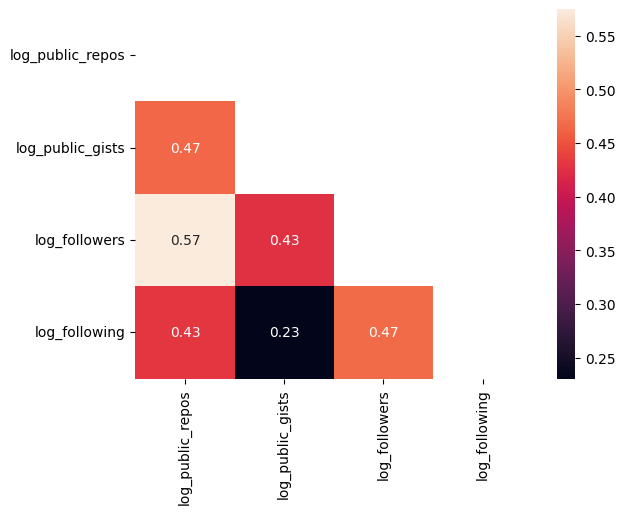

In [29]:
mask=np.zeros_like(log_data.corr(),dtype=np.bool_)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(log_data.corr(),mask=mask,annot=True)
plt.show()

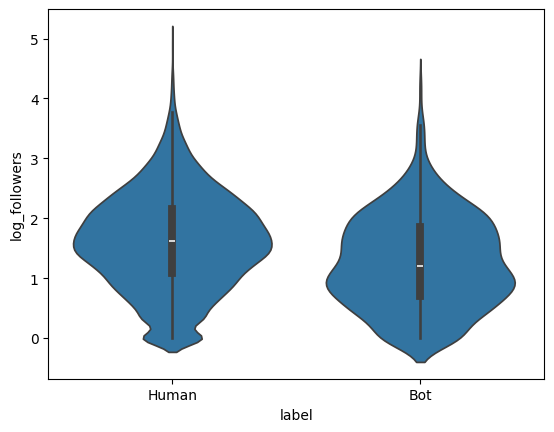

In [30]:
sns.violinplot(data=data_c,x="label",y="log_followers")
plt.show()

In [34]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]